In [7]:
# Adding collatz package to python path
import sys
sys.path.append('..')

# importing the dynamical package
from collatz.collatz import CollatzProblem
from collatz.functions import collatz_extension
from collatz.dynamical import DDS
from collatz.utils import generate_complex

#other useful libraries
import numpy as np
import random

import matplotlib.pyplot as plt

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def collatz_extension(x):
    return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)

def mandelbrot_set(f, xrange, yrange, stop_iterations, threshold = 1, diverge_method = 'abs', julia = False):
    ''' A function to determine the values of the Julia set. Takes
    an array size specified by h_range and w_range, in pixels, along
    with the number of maximum iterations to try.  Returns an array with 
    the number of the last bounded iteration at each array value.
    '''
    # Grid with the values to iterate over lower limit : upper limit : number of values
    x, y = np.ogrid[xrange[0]: xrange[1]: xrange[2]*1j, yrange[0]: yrange[1]: yrange[2]*1j]
    
    # Creation of the matrix with numbers to iterate 
    z = np.transpose(x + y*1j)
    
    if julia:
        c = np.zeros(z.shape, dtype = z.dtype)
    else:
        c = z 
    
    # If number is never reached, then divergence is assumed
    iterations = stop_iterations + np.zeros(z.shape)
    not_diverged = np.full(z.shape, True) # Auxiliar for numbers that haven't diverged yet
    diverged = np.full(z.shape, False) # Auxiliar for numers that diverged.
    
    for i in range(stop_iterations):
        z = f(z) + c#f^i(z)
        if diverge_method == 'abs':
            diverging = abs(z) > threshold
        elif diverge_method == 'real_or_imag':
            diverging = (abs(np.real(z)) > threshold) | (abs(np.imag(z)) > threshold)
        elif diverge_method == 'real_part':
            diverging = abs(np.real(z)) > threshold
        elif diverge_method == 'imag_part':
            diverging = abs(np.imag(z)) > threshold
        else:
            diverging = (abs(np.real(z)) > threshold) & (abs(np.imag(z)) > threshold)
            
        new_diverging = diverging & not_diverged
        iterations[new_diverging] = i
        not_diverged = np.invert(new_diverging) & not_diverged
        
        # prevent overflow for diverging numbers
        diverged = diverged | new_diverging
        z[diverged] = np.inf
    return iterations

def plot_fractal(mandelbrot_set, xrange, yrange, figsize = (50,10), cmap = 'inferno', labels_size = (20, 20), ticks_size = (20, 20)):
    plt.rcParams["figure.figsize"] = figsize
    # Objects for color bar
    fig = plt.figure()
    ax = plt.axes() 
    
    im = plt.imshow(mandelbrot_set, cmap='inferno', interpolation = 'spline16', extent = (xrange[0], xrange[1], yrange[0], yrange[1]), origin = 'lower')
    
    #axes labels
    plt.xlabel('Re(z)', fontsize = labels_size[0])
    plt.ylabel('Im(z)', fontsize = labels_size[0])
    
    #ticks fontsize
    plt.xticks(fontsize=ticks_size[0])
    plt.yticks(fontsize=ticks_size[1])   
    
    if mandelbrot_set.shape[0] < mandelbrot_set.shape[1]:
        # sets color bar horizontal
        cax = fig.add_axes([ax.get_position().x0,
                    ax.get_position().y0-0.2,
                    ax.get_position().width,
                    0.02])
        orientation = 'horizontal'
        tickssize = ticks_size[0]
        labelsize = labels_size[0]
    else:
        # sets color bar vertical
        cax = fig.add_axes([ax.get_position().x1+0.01,
                    ax.get_position().y0,
                    0.02,
                    ax.get_position().height])
        orientation = 'vertical'
        tickssize = ticks_size[1]
        labelsize = labels_size[1]
        
    cbar = plt.colorbar(im, cax = cax, orientation = orientation)
    cbar.ax.tick_params(labelsize=tickssize)
    cbar.set_label(label='Iteraciones',size=labelsize)
    plt.show()

# Mandelbrot set and some Julia sets

/tmp/ipykernel_222117/1175094640.py:1: RuntimeWarning: invalid value encountered in cdouble_scalars
  mandelbrot = np.vectorize(lambda z: z**2)


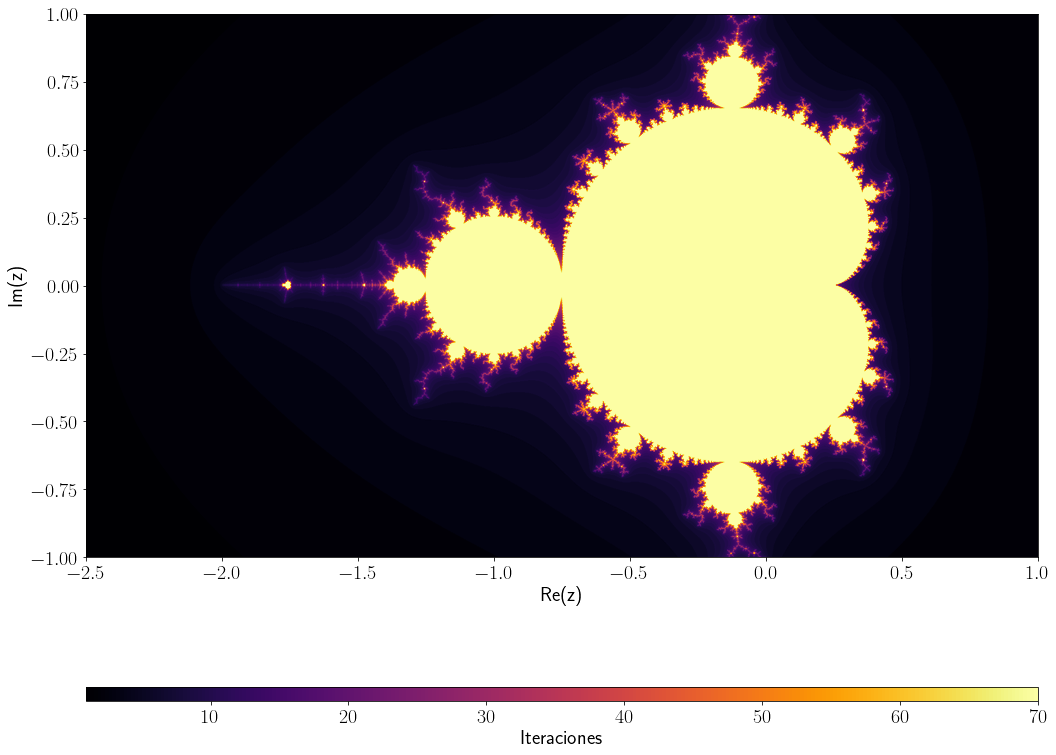

In [31]:
mandelbrot = np.vectorize(lambda z: z**2)
mandelbrot_dds = DDS([], mandelbrot, iterations = 10, stop_iterations = 70)
xrange = (-2.5, 1, 5000) 
yrange = (-1, 1, 1000) 
iterations = mandelbrot_dds.mandelbrot_set(xrange = xrange,
                yrange = yrange,
                threshold = 10, 
                diverge_method = 'abs',
                julia = False)

mandelbrot_dds.plot_fractal(iterations, xrange, yrange)

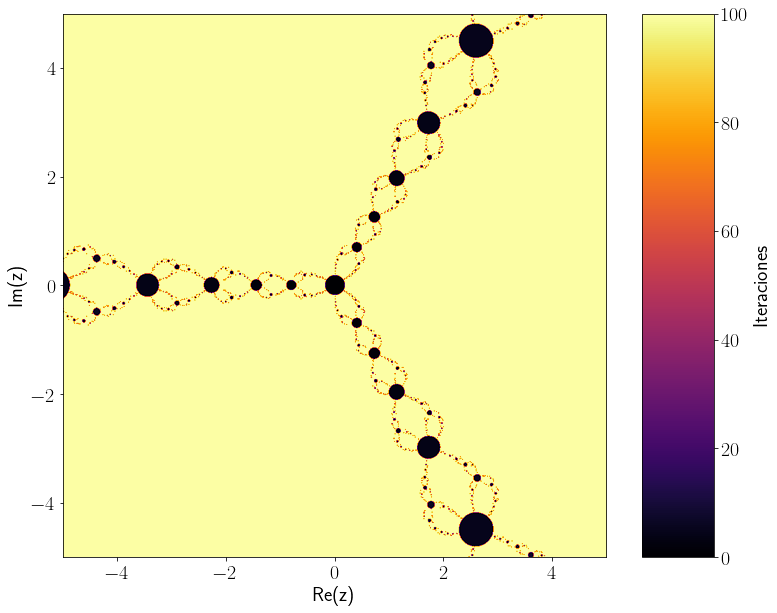

In [21]:
newton = np.vectorize(lambda z: z - (z**3 - 1)/(3*(z**2)))
newton_dds = DDS([], newton, iterations = 10, stop_iterations = 100)
xrange = (-5, 5, 1000) 
yrange = (-5, 5, 1000) 
iterations = newton_dds.mandelbrot_set(xrange = xrange,
                yrange = yrange,
                threshold = 10, 
                diverge_method = 'abs',
                julia = True)

newton_dds.plot_fractal(iterations, xrange, yrange)

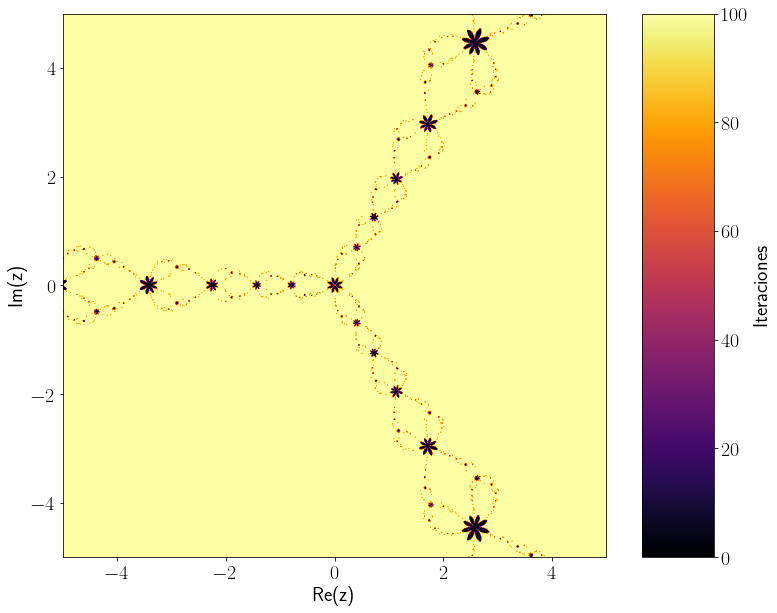

In [24]:
newton = np.vectorize(lambda z: z - (z**3 - 1)/(3*(z**2)))
newton_dds = DDS([], newton, iterations = 10, stop_iterations = 100)
xrange = (-5, 5, 1000) 
yrange = (-5, 5, 1000) 
iterations = newton_dds.mandelbrot_set(xrange = xrange,
                yrange = yrange,
                threshold = 10, 
                diverge_method = 'real',
                julia = True)

newton_dds.plot_fractal(iterations, xrange, yrange)

/tmp/ipykernel_222117/1660235673.py:1: RuntimeWarning: invalid value encountered in cdouble_scalars
  julia_pol = np.vectorize(lambda z: z**2 - 1)


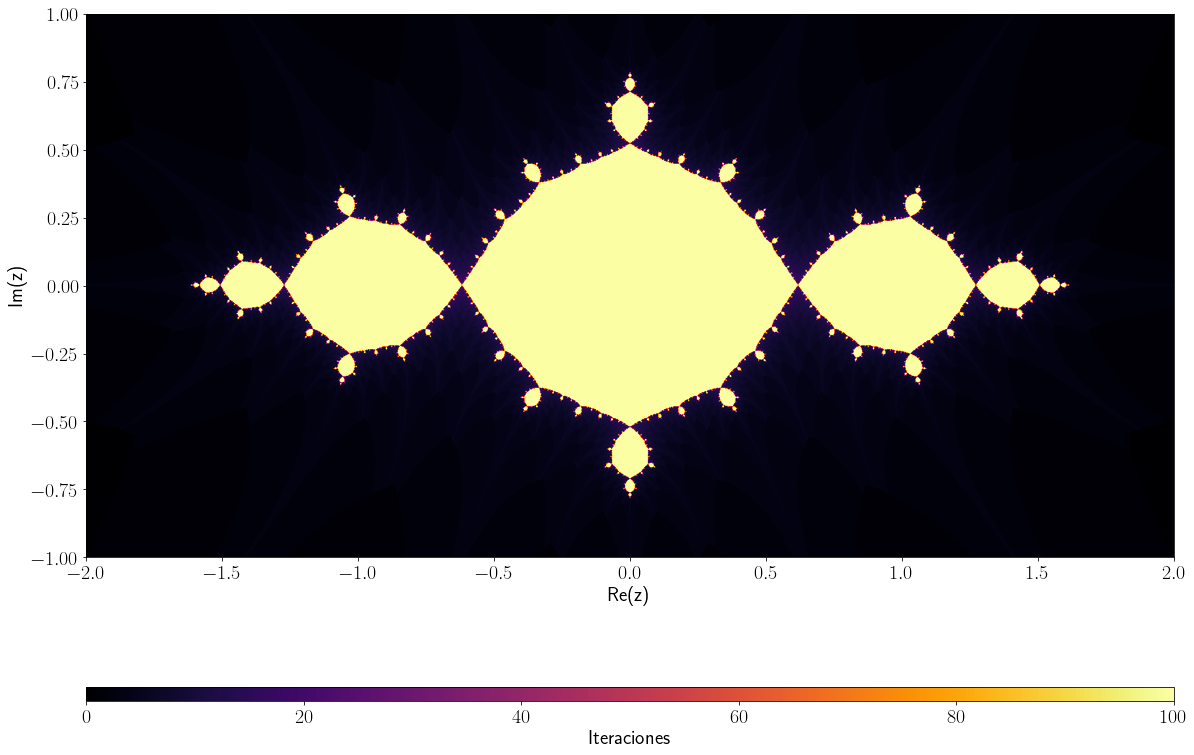

In [30]:
julia_pol = np.vectorize(lambda z: z**2 - 1)
julia_pol_dds = DDS([], julia_pol, iterations = 10, stop_iterations = 100)
xrange = (-2, 2, 2000) 
yrange = (-1, 1, 1000) 
iterations = julia_pol_dds.mandelbrot_set(xrange = xrange,
                yrange = yrange,
                threshold = 2, 
                diverge_method = 'real',
                julia = True)

julia_pol_dds.plot_fractal(iterations, xrange, yrange)

/tmp/ipykernel_172130/14090868.py:1: RuntimeWarning: invalid value encountered in square
  mandelbrot = lambda z: z**2


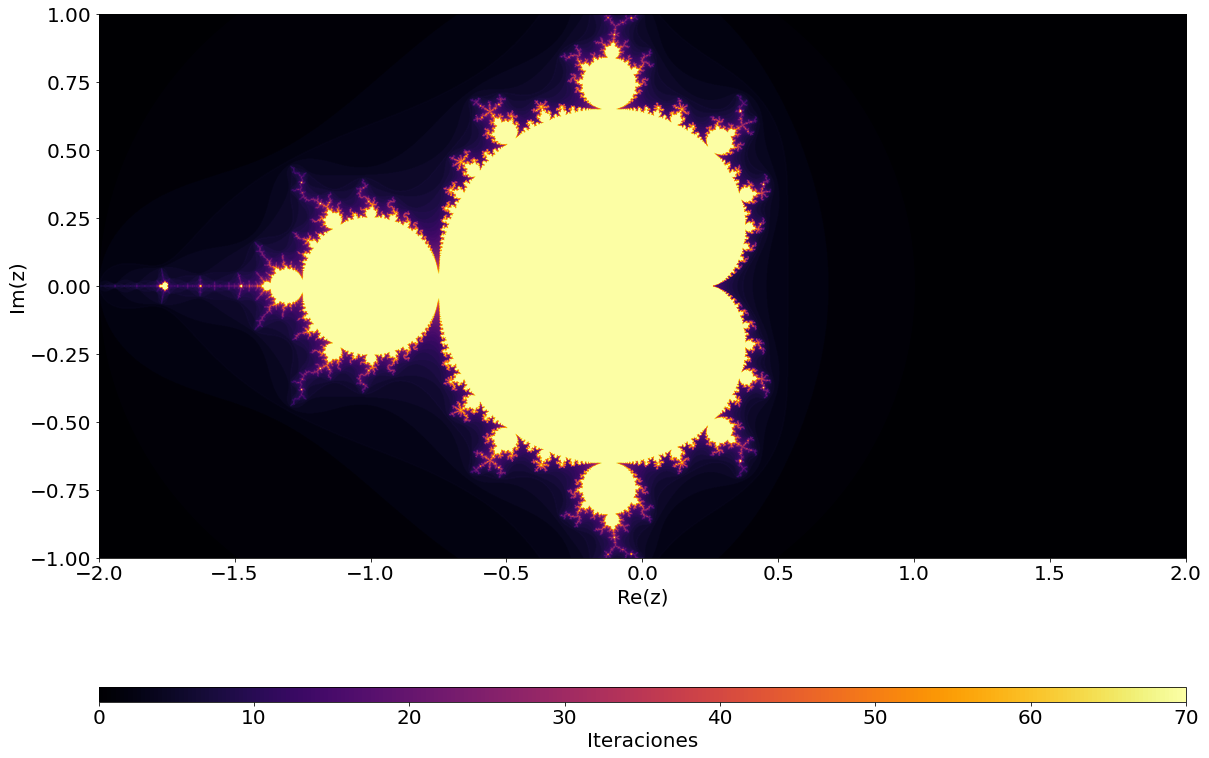

In [7]:
mandelbrot = lambda z: z**2
vmandelbrot = np.vectorize(mandelbrot)
xrange = (-2, 2, 5000) 
yrange = (-1, 1, 1000) 
stop_iterations = 70
threshold = 2
test = mandelbrot_set(mandelbrot,
                xrange = xrange,
                yrange = yrange,
                stop_iterations = stop_iterations,
                threshold = threshold, 
                diverge_method = 'abs',
                julia = False)
plot_fractal(test, xrange, yrange)

/tmp/ipykernel_172130/2494690248.py:1: RuntimeWarning: invalid value encountered in cdouble_scalars
  basins = np.vectorize(lambda z: z - ((z**3 - 1)/3*z**2))
/home/icetoy/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2387: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)


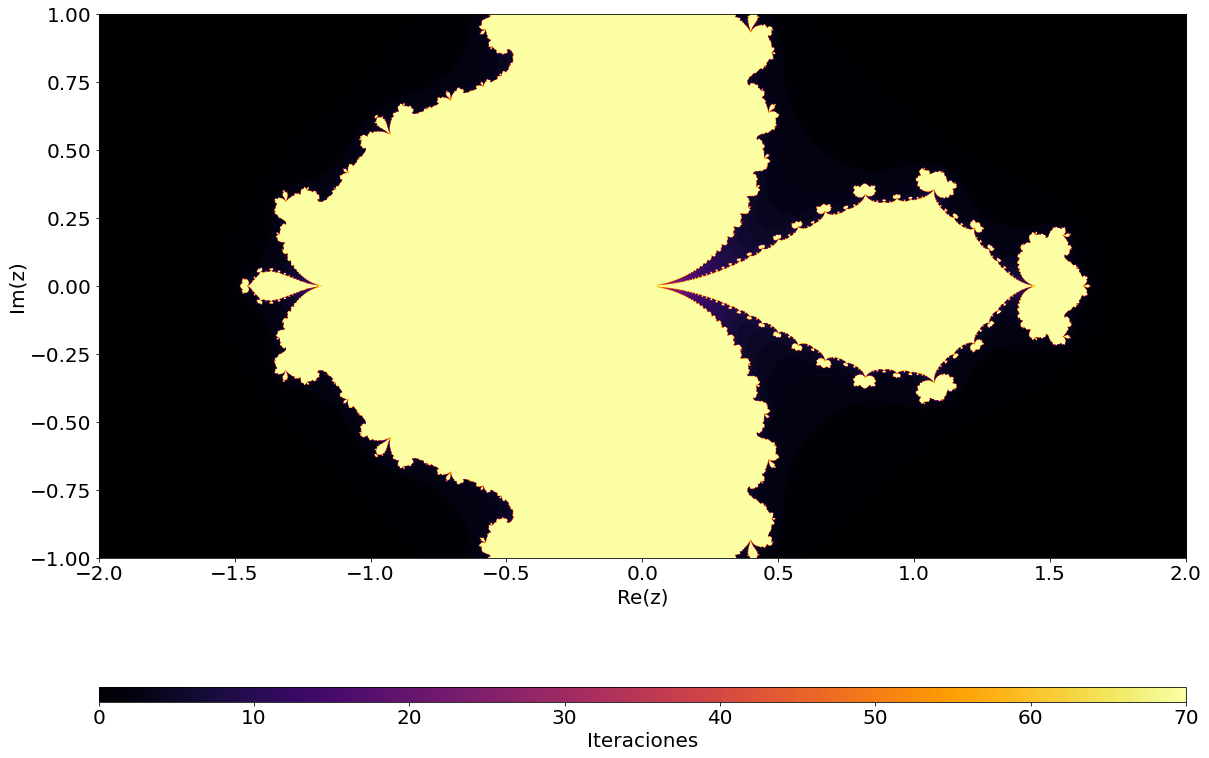

In [11]:
basins = np.vectorize(lambda z: z - ((z**3 - 1)/3*z**2))
xrange = (-2, 2, 5000) 
yrange = (-1, 1, 1000) 
stop_iterations = 70
threshold = 2
test = mandelbrot_set(basins,
                   xrange = xrange,
                   yrange = yrange,
                   stop_iterations = stop_iterations,
                   threshold = threshold, 
                   diverge_method = 'abs',
                    julia = True)
plot_fractal(test, xrange, yrange)

# Julia sets of analytical extension

In [12]:
initial_values = generate_complex(xrange, yrange).flatten()
collatz_dds = DDS([], collatz_extension, iterations = 10, stop_iterations = 70, start = 'orbit') #

xrange = (-2, 2, 5000) 
yrange = (-1, 1, 1000) 

## Abs metric

### Threshold = 2

In [ ]:
iterations = collatz_dds.mandelbrot_set(xrange = xrange,
                yrange = yrange,
                threshold = 2, 
                diverge_method = 'abs',
                julia = True)

collatz_dds.plot_fractal(iterations, xrange, yrange)

### Threshold = 10

In [ ]:
iterations = collatz_dds.mandelbrot_set(xrange = xrange,
                yrange = yrange,
                threshold = 10, 
                diverge_method = 'abs',
                julia = True)

collatz_dds.plot_fractal(iterations, xrange, yrange)

### Threshold = 50

In [ ]:
iterations = collatz_dds.mandelbrot_set(xrange = xrange,
                yrange = yrange,
                threshold = 50, 
                diverge_method = 'abs',
                julia = True)

collatz_dds.plot_fractal(iterations, xrange, yrange)

### Threshold = 100

In [ ]:
iterations = collatz_dds.mandelbrot_set(xrange = xrange,
                yrange = yrange,
                threshold = 100, 
                diverge_method = 'abs',
                julia = True)

collatz_dds.plot_fractal(iterations, xrange, yrange)

In [12]:
xrange = (-1.5, 1.5, 5000) 
yrange = (-0.5, 0.5, 1000) 
stop_iterations = 70
threshold = 10

/tmp/ipykernel_172130/27867506.py:5: RuntimeWarning: invalid value encountered in multiply
  return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)


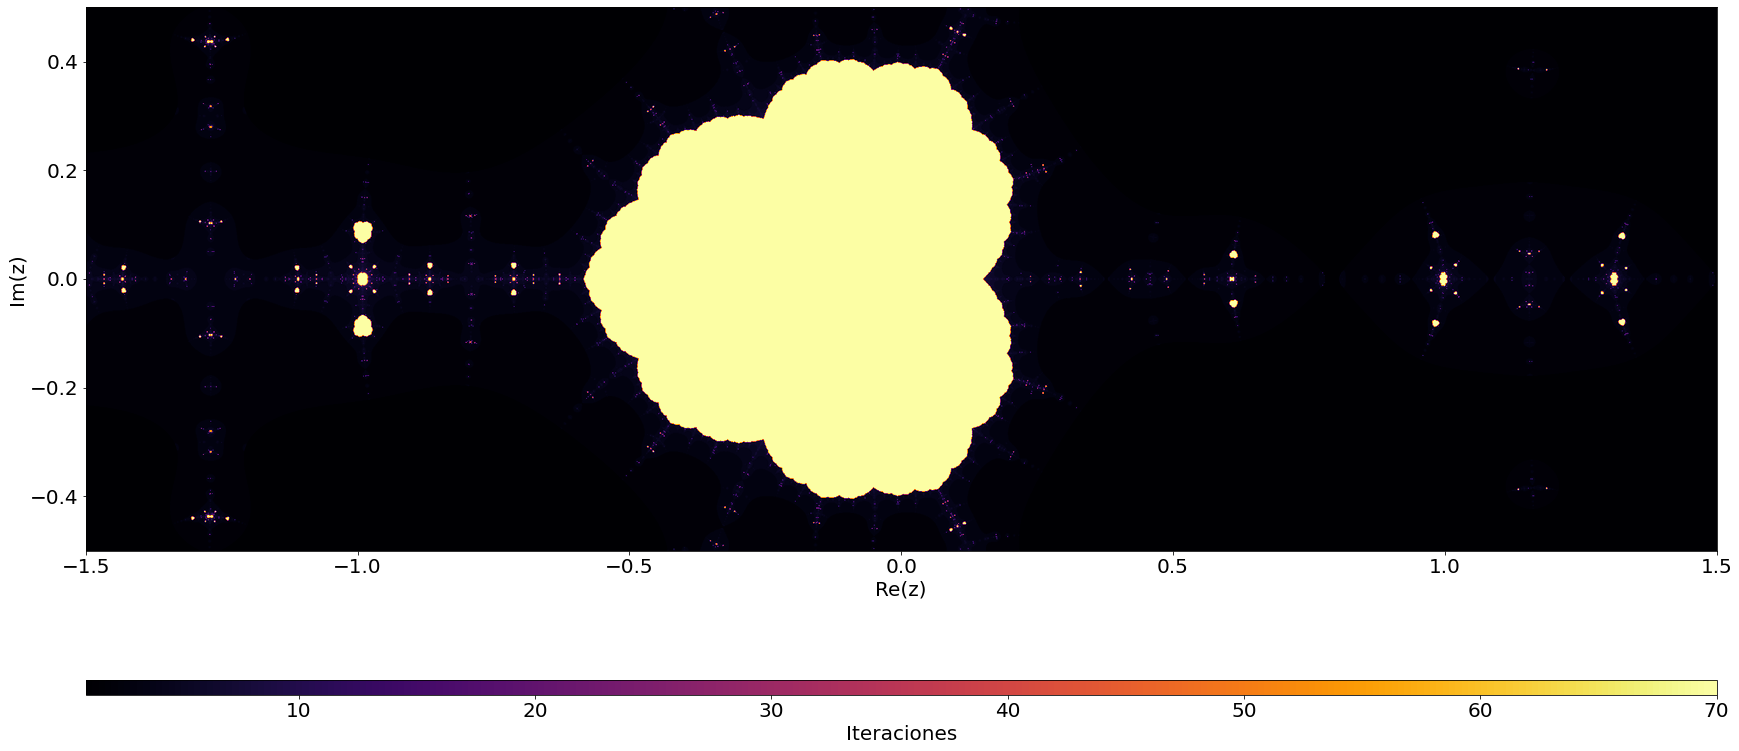

In [13]:
iterations = mandelbrot_set(collatz_extension,
                       xrange = xrange,
                       yrange = yrange,
                       stop_iterations = stop_iterations,
                       threshold = threshold, 
                       diverge_method = 'abs',
                        julia = True)
plot_fractal(iterations, xrange, yrange)

/tmp/ipykernel_172130/27867506.py:5: RuntimeWarning: invalid value encountered in multiply
  return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)


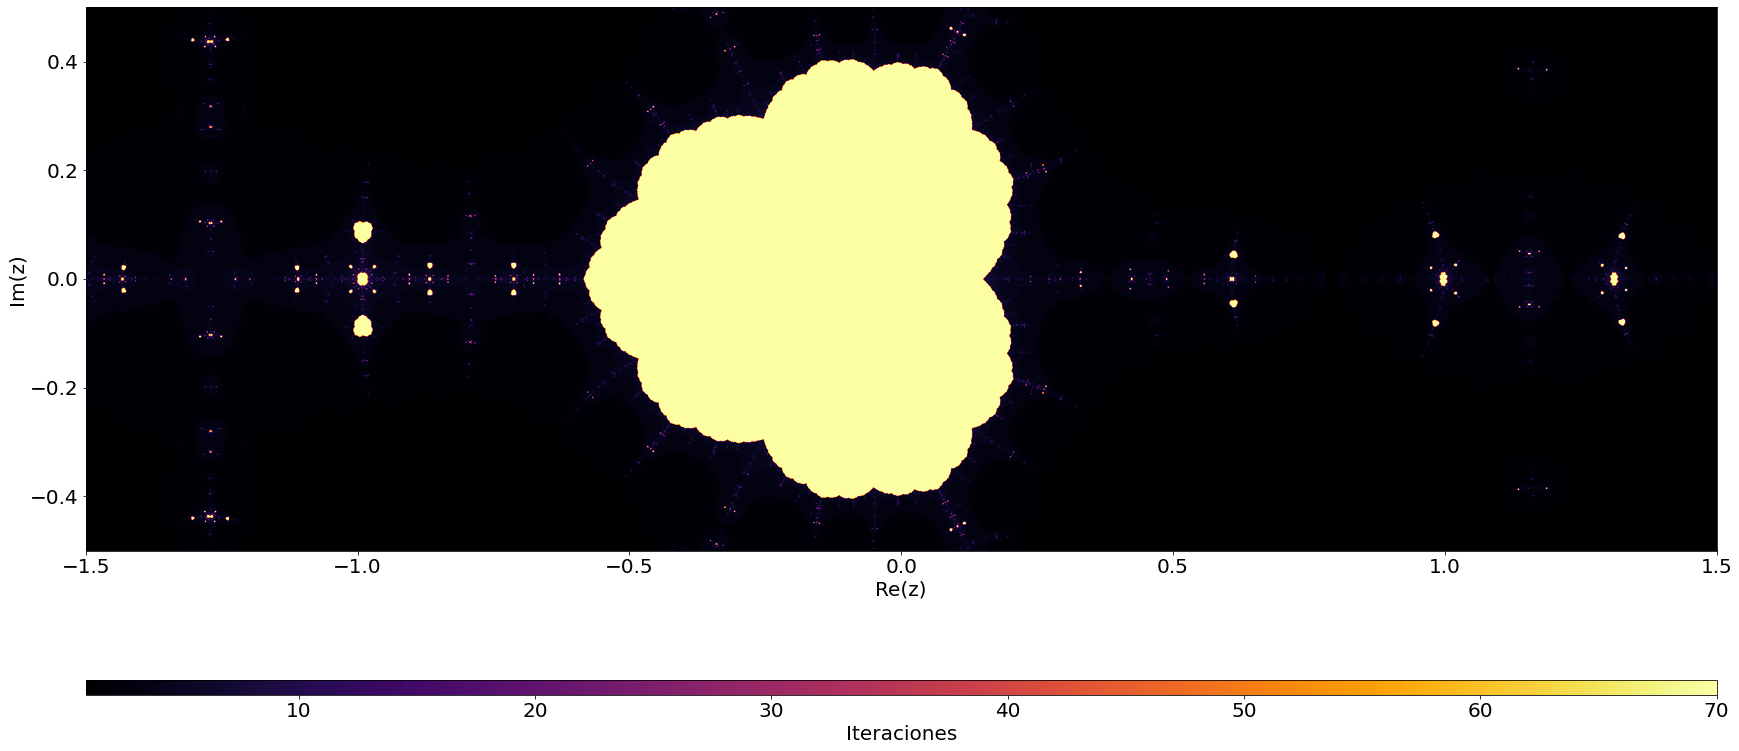

In [14]:
iterations = mandelbrot_set(collatz_extension,
                       xrange = xrange,
                       yrange = yrange,
                       stop_iterations = stop_iterations,
                       threshold = threshold, 
                       diverge_method = 'real_or_imag',
                        julia = True)
plot_fractal(iterations, xrange, yrange)

/tmp/ipykernel_172130/27867506.py:5: RuntimeWarning: invalid value encountered in multiply
  return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)
/tmp/ipykernel_172130/27867506.py:5: RuntimeWarning: overflow encountered in cos
  return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)
/tmp/ipykernel_172130/27867506.py:5: RuntimeWarning: overflow encountered in multiply
  return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)


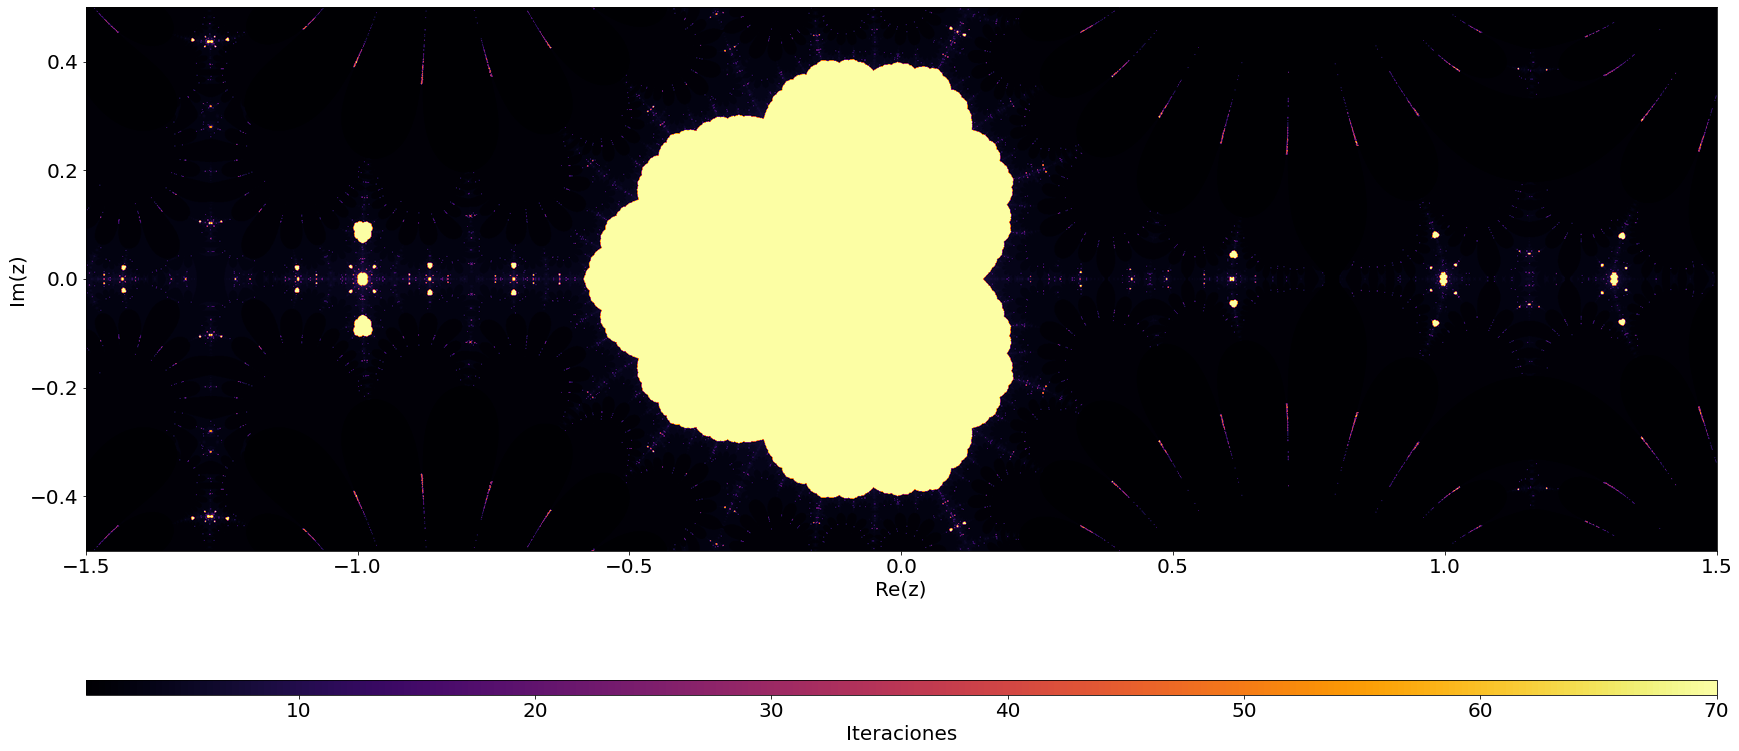

In [15]:
iterations = mandelbrot_set(collatz_extension,
                       xrange = xrange,
                       yrange = yrange,
                       stop_iterations = stop_iterations,
                       threshold = threshold, 
                       diverge_method = 'real_part',
                        julia = True)
plot_fractal(iterations, xrange, yrange)

/tmp/ipykernel_172130/27867506.py:5: RuntimeWarning: invalid value encountered in multiply
  return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)


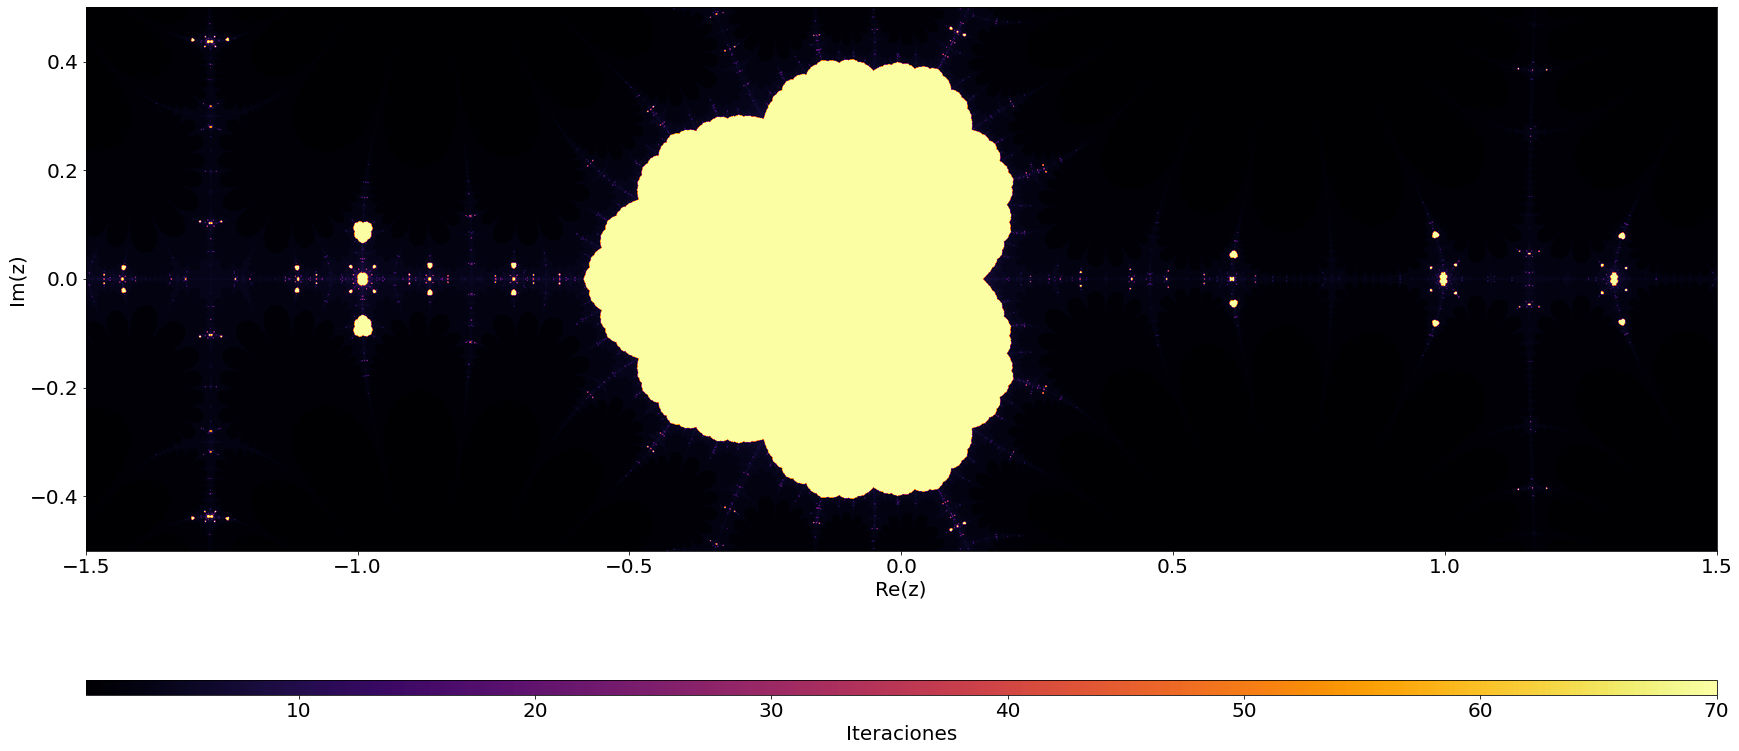

In [16]:
iterations = mandelbrot_set(collatz_extension,
                       xrange = xrange,
                       yrange = yrange,
                       stop_iterations = stop_iterations,
                       threshold = threshold, 
                       diverge_method = 'imag_part',
                        julia = True)
plot_fractal(iterations, xrange, yrange)

/tmp/ipykernel_172130/27867506.py:5: RuntimeWarning: invalid value encountered in multiply
  return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)
/tmp/ipykernel_172130/27867506.py:5: RuntimeWarning: overflow encountered in cos
  return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)
/tmp/ipykernel_172130/27867506.py:5: RuntimeWarning: overflow encountered in multiply
  return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)


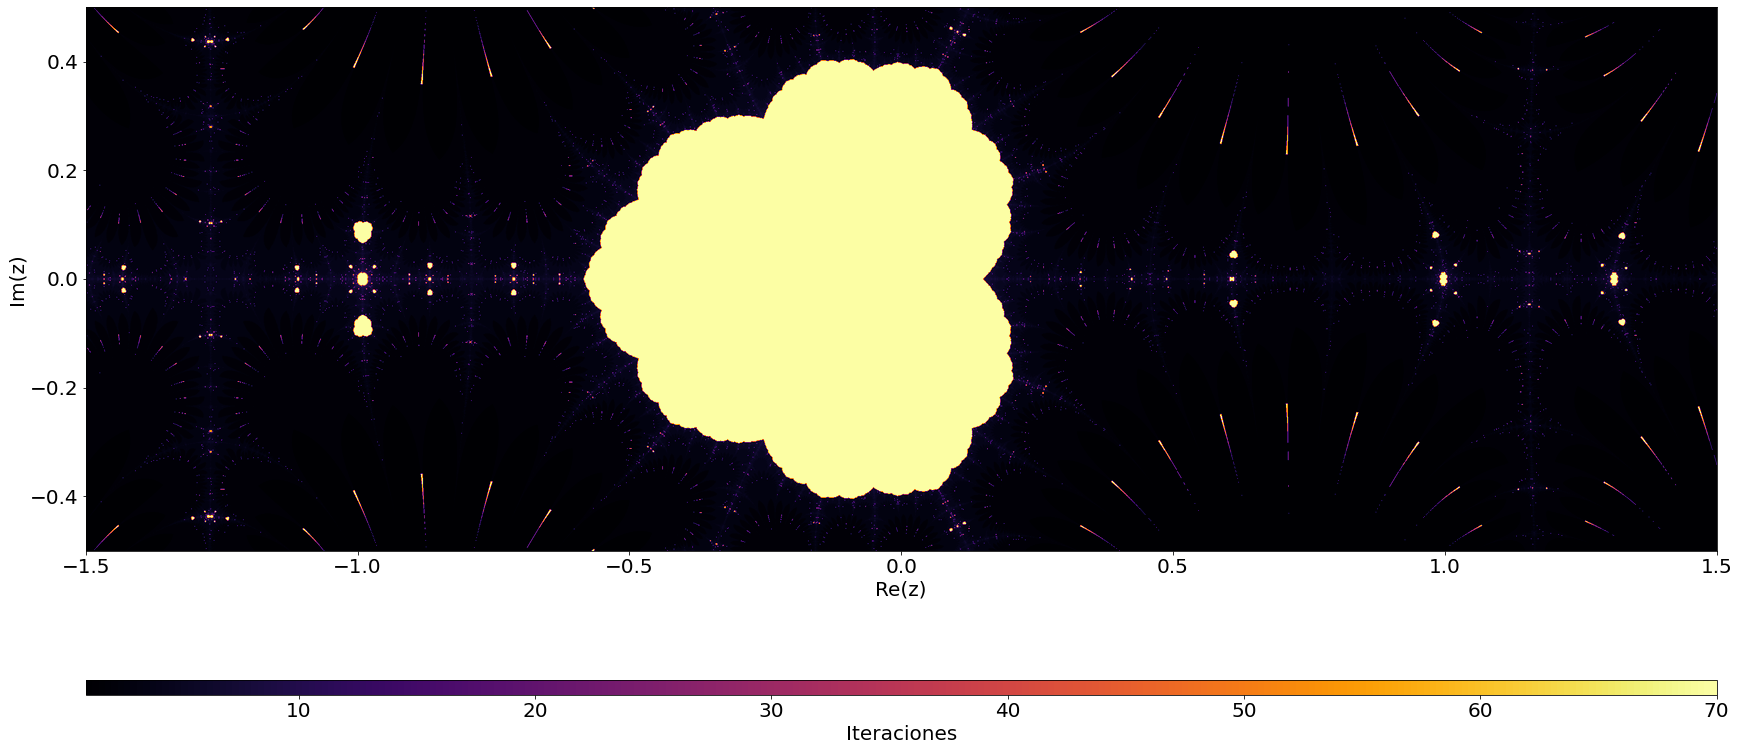

In [17]:
iterations = mandelbrot_set(collatz_extension,
                       xrange = xrange,
                       yrange = yrange,
                       stop_iterations = stop_iterations,
                       threshold = threshold, 
                       diverge_method = 'real_and_imag',
                        julia = True)
plot_fractal(iterations, xrange, yrange)

/tmp/ipykernel_172130/27867506.py:5: RuntimeWarning: invalid value encountered in multiply
  return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)


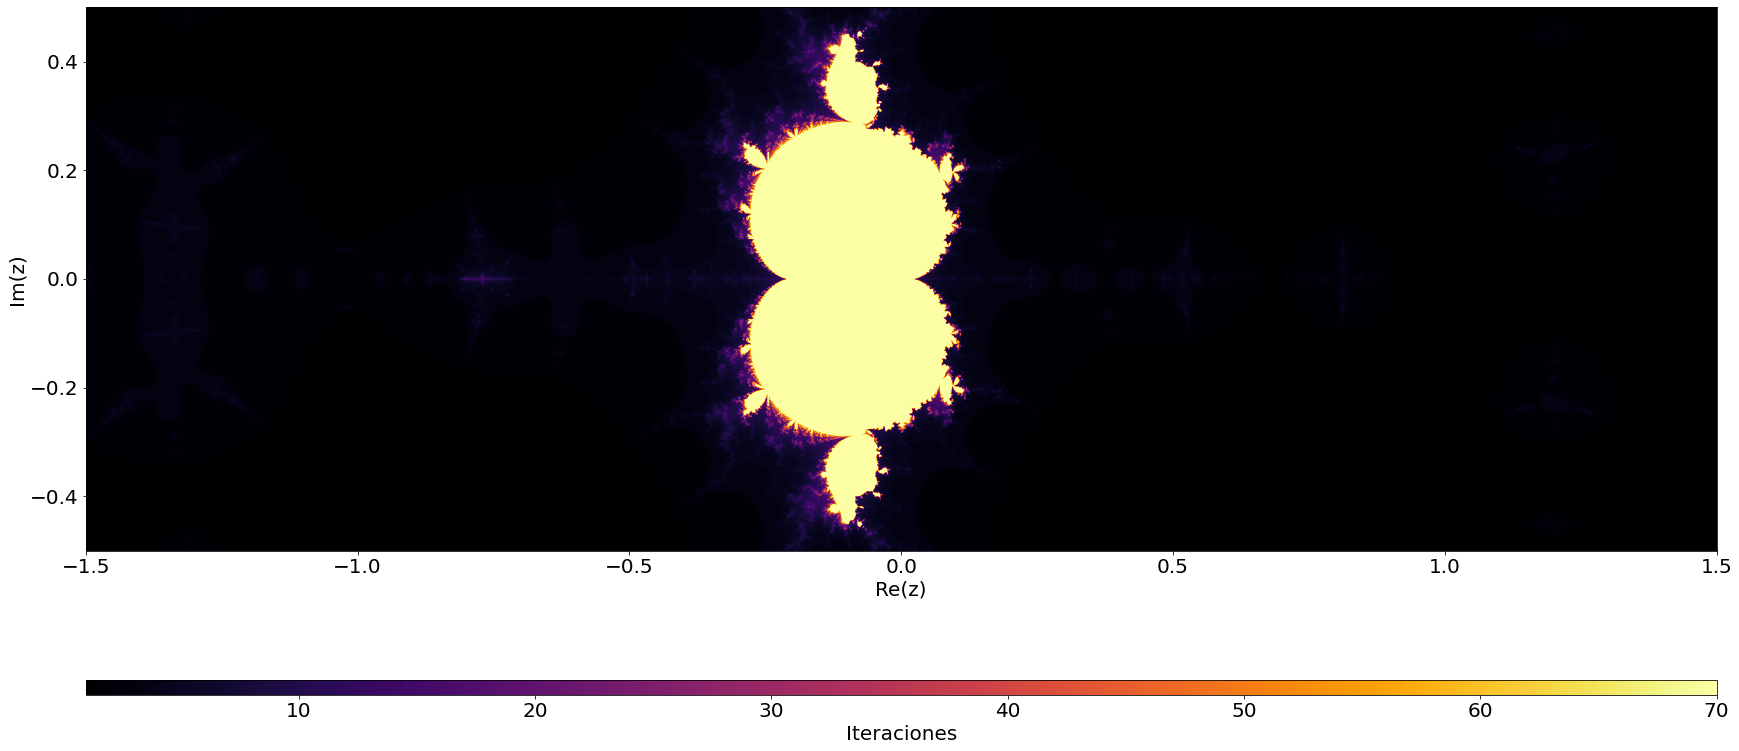

In [18]:
iterations = mandelbrot_set(collatz_extension,
                       xrange = xrange,
                       yrange = yrange,
                       stop_iterations = stop_iterations,
                       threshold = threshold, 
                       diverge_method = 'abs',
                        julia = False)
plot_fractal(iterations, xrange, yrange)

/tmp/ipykernel_133360/127112255.py:5: RuntimeWarning: invalid value encountered in multiply
  return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)
/tmp/ipykernel_133360/127112255.py:5: RuntimeWarning: overflow encountered in cos
  return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)
/tmp/ipykernel_133360/127112255.py:5: RuntimeWarning: overflow encountered in multiply
  return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)
/tmp/ipykernel_133360/127112255.py:5: RuntimeWarning: invalid value encountered in multiply
  return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)
/tmp/ipykernel_133360/127112255.py:5: RuntimeWarning: overflow encountered in cos
  return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)
/tmp/ipykernel_133360/127112255.py:5: RuntimeWarning: overflow encountered in multiply
  return 1.75*x + 0.5 - (1.25*x + 0.5)*np.cos(np.pi*x)
/tmp/ipykernel_133360/127112255.py:27: RuntimeWarning: overflow encountered in absolute
  diverging = abs(z) > threshold


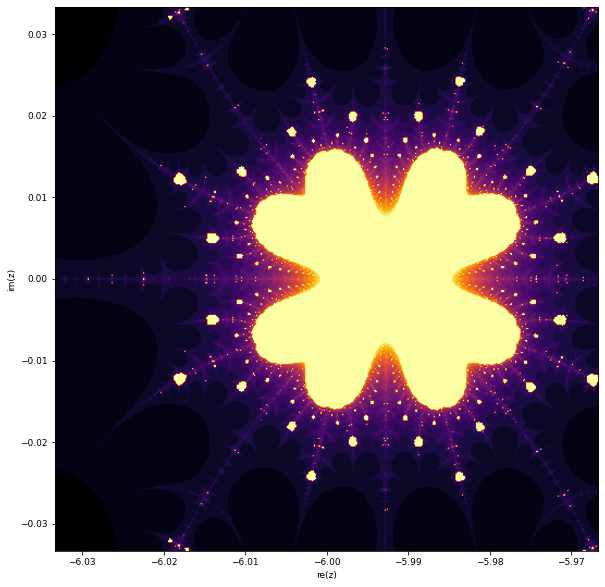

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

frames = 120  # number of frames in the animation

fig = plt.figure()
ax = plt.axes()
ax.set(xlabel = 'Re(z)', ylabel = 'Im(z)')

start_distance = 0.5
zoom_rate = 0.5
zoom_point = [-6, 0] 

def zoom(i):
    xrange = (start_distance/(zoom_rate*(i+1)) + zoom_point[0], zoom_point[0] + start_distance/(zoom_rate*(i+1)), 500) 
    yrange = (-start_distance/(zoom_rate*(i+1)) + zoom_point[1], zoom_point[1] + start_distance/(zoom_rate*(i+1)), 500)
    X = julia_set(collatz_extension,
              xrange,
              yrange,
              stop_iterations = 30,
              threshold = 1000)
    img = ax.imshow(X, cmap='inferno', interpolation = 'spline16', origin = 'lower', extent = [xrange[0], xrange[1], yrange[0], yrange[1]])
    return [img]


anim = animation.FuncAnimation(fig, zoom, frames = frames, interval = 100, blit = True)
anim.save('zoom_2.gif', writer='pillow')